<AxesSubplot:title={'center':'stock_year.csv'}, xlabel='日期'>

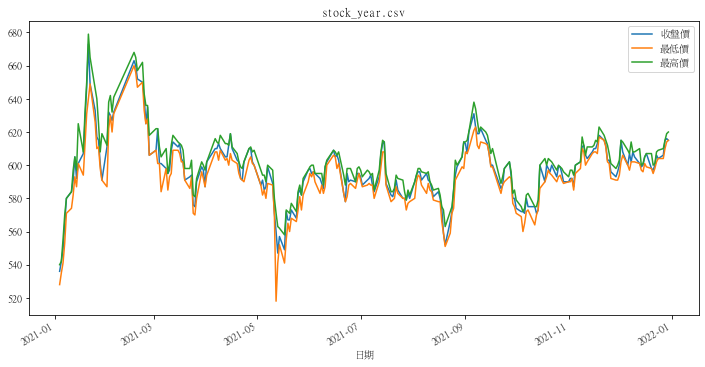

In [10]:
def todigit(n):
    if n<10:
        return '0'+str(n)
    else:
        retstr=str(n)
        return retstr

def convertDate(date):
    date_str=str(date)
    year_str=date_str[:3]
    realYear=str(int(year_str)+1911)
    realDate=realYear+date_str[4:6]+date_str[7:9]

    return realDate
import requests,re,time
import json,csv
import pandas as pd
import os
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"]="mingliu" #中文字型
plt.rcParams["axes.unicode_minus"]=False

pd.options.mode.chained_assignment=None

url_base = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2021'
url_tail='01&stockNo=2330&_=1670560076969'
file_path='stock_year.csv'

if not os.path.isfile(file_path):
    for i in range(1,13):
        url_twse=url_base+todigit(i)+url_tail
    # url_twse='https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20210801&stockNo=2330&_=1670560076969'
        res=requests.get(url_twse)
        json_data=json.loads(res.text)
        outputFile=open(file_path,'a',newline='',encoding='UTF-8')
        outputWriter=csv.writer(outputFile)
        if i==1:
            outputWriter.writerow(json_data['fields'])
        
        for dataLine in (json_data['data']):
            outputWriter.writerow(dataLine)
        time.sleep(0.5)
    outputFile.close()

pdstock=pd.read_csv(file_path,encoding='UTF-8')
for i in range(len(pdstock['日期'])):
    pdstock['日期'][i] = convertDate(pdstock['日期'][i])
pdstock['日期']=pd.to_datetime(pdstock['日期'])
df_plot=pdstock.plot(kind='line',figsize=(12,6),x="日期",y=["收盤價","最低價","最高價"],title=file_path) #畫統計圖
df_plot